In [1]:
# 1969년도
# 깊은 신경망(Deep neural Network:DNN) 
# 문제점: 학습이 불가능함(학습의 방향)

# 1986년도
# 문제해결: Backpropagation 뒤에서 역으로 재조정
# 문제점: 신경망이 더욱 많은 레이어를 갖게 되면 역전파로도 잘 학습이 되지 않는다는 문제가 발생
# 다른 머신러닝 알고리즘이 생겨나고 DNN보다 정확도가 높았다.

# 2006~2007년
# 가중치 초기값만 잘 지정해 준다면 잘된다. 신경망을 깊게 만들어도 복잡한 문제를 잘 풀 수 있는 환경
# Nueral Network
# Deep Network
# Deep learning

# Deep learning: 인공 신경망에 기반을 둔 머신 러닝 기술의 한 종류
# 다층 구조로 설계하여 깊어진 인공 신경망이 학습이 잘 이루어 지지 않는 
# 전통적인 문제를 학습을 위한 데이터들을 비지도 학습을 통해 
# 전처리 하면 신경망이 깊어져도 학습이 잘 된다는 것

import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [2]:
tf.set_random_seed(777)

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./mnist/data',one_hot=True)
# C:\Users\acorn\jupyter_workspace\mnist\data에 우편변호 데이터 저장됨

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data\t10k-images-idx3-ubyte.gz
Extracting ./mnist/data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
# 숫자 0~9 : 10개
nb_classes=10

# 28*28 = 784
X = tf.placeholder(tf.float32, [None,784])

# 0~9 : 10
Y = tf.placeholder(tf.float32, [None,nb_classes])

#Y = a1*x1 + a2*x2 + a3*x3 ... (784개의 an*xn)+ b
W = tf.Variable(tf.random_normal([784,nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# one hot key 방식
# 00001 : F
# 00010 : D
# 00100 : C
# 01000 : B
# 10000 : A

# 0.91 0.01 0.02 0.03 0.05
# 1    0    0    0    0
# 소프트 맥스 함수
model = tf.nn.softmax(tf.matmul(X,W)+b)
model


<tf.Tensor 'Softmax:0' shape=(?, 10) dtype=float32>

In [5]:
loss = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(model), axis=1)) 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

<h3>Test model</h3>

In [6]:
is_correct = tf.equal(tf.arg_max(model,1),tf.arg_max(Y,1))

Instructions for updating:
Use `argmax` instead


<h3>정확도</h3>

In [7]:
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
accuracy

<tf.Tensor 'Mean_1:0' shape=() dtype=float32>

In [8]:
train_epochs = 15 # 15번의 학습
batch_size = 100
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(train_epochs):
    # train cycle
    avg_cost = 0
    total_batch = int(mnist.train.num_examples/batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([loss,optimizer],feed_dict={X:batch_xs,Y:batch_ys})
        avg_cost += c/total_batch
        #pritn("ecoch: ", epoch, "cost: ", avg_cost)
print("정확도: ", sess.run(accuracy,feed_dict={X:mnist.test.images,Y:mnist.test.labels}))

정확도:  0.7941


In [9]:
# 랜덤하게  1개를 뽑아서 예측값과 실제 값과 비교
r = random.randint(0, mnist.test.num_examples-1)
print(r)

4607


In [10]:
print("Label: ",sess.run(tf.arg_max(mnist.test.labels[r:r+1],1)))
print("예측값: ",sess.run(tf.arg_max(model,1),feed_dict={X:mnist.test.images[r:r+1]}))

Label:  [6]
예측값:  [6]


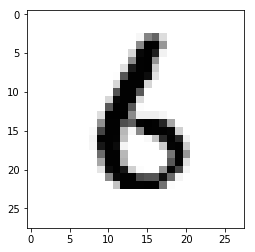

In [11]:
plt.imshow(mnist.test.images[r:r+1].reshape(28,28),cmap="Greys")
plt.show()

<h3>CNN(Convolution Neural Network)</h3>

In [ ]:
# 영상과 음성에서 좋은 성능을 보이는 알고리즘
# CNN <= 신경망 + 필터 기술
# 전처리작업으로 convolution 작업 실행 후 작업
# 2차원 영상을 잘 습득할 수 있도록 최적화 시킨 알고리즘
# Deep learning 의 한종류

In [ ]:
# MLP(Multi Layer Perceptrons)의 문제점
# 정자로 쓰는 사람, 왼손으로 쓰는 사람, 비틀어서 쓰는 사람
# 글자의 topology를 고려하지 못함
# raw data를 직접적으로 처리 ==> 많은 학습 데이터가 필요
# 많은 학습 데이터는 학습에 많은 자원을 필요로 한다.

In [ ]:
# 결론적으로 MLP의 문제점을 보안하기 위한 방법으로 CNN 체택

In [ ]:
# Convolution
# 합성적
# 수학적: 앞과 뒤에 수식을 연산하는 것(사칙연산제외)
# 두 신호를 합쳐서 새로운 신호를 만들어내는 방법
# 영상신호에서는 필터를 통한 연산을 의미

In [ ]:
# max pooling 
# average pooling 